In [7]:

!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 10.9 MB/s eta 0:00:00


In [8]:
import numpy as np

In [9]:
import skfuzzy as fuzz

In [10]:
from skfuzzy import control as ctrl

In [11]:
import matplotlib.pyplot as plt

In [12]:

glukosa = ctrl.Antecedent(np.arange(50, 201, 1), 'glukosa')
bmi = ctrl.Antecedent(np.arange(10, 50, 1), 'bmi')
risiko = ctrl.Consequent(np.arange(0, 101, 1), 'risiko')

In [13]:

glukosa['rendah'] = fuzz.trimf(glukosa.universe, [50, 50, 100])
glukosa['sedang'] = fuzz.trimf(glukosa.universe, [80, 120, 160])
glukosa['tinggi'] = fuzz.trimf(glukosa.universe, [140, 200, 200])

In [14]:

bmi['normal'] = fuzz.trimf(bmi.universe, [10, 18.5, 25])
bmi['overweight'] = fuzz.trimf(bmi.universe, [23, 27, 30])
bmi['obesitas'] = fuzz.trimf(bmi.universe, [28, 40, 50])

In [15]:

risiko['rendah'] = fuzz.trimf(risiko.universe, [0, 0, 50])
risiko['sedang'] = fuzz.trimf(risiko.universe, [25, 50, 75])
risiko['tinggi'] = fuzz.trimf(risiko.universe, [50, 100, 100])

In [16]:

rule1 = ctrl.Rule(glukosa['rendah'] & bmi['normal'], risiko['rendah'])
rule2 = ctrl.Rule(glukosa['rendah'] & bmi['overweight'], risiko['sedang'])
rule3 = ctrl.Rule(glukosa['sedang'] & bmi['normal'], risiko['sedang'])
rule4 = ctrl.Rule(glukosa['sedang'] & bmi['overweight'], risiko['tinggi'])
rule5 = ctrl.Rule(glukosa['tinggi'] & bmi['normal'], risiko['tinggi'])
rule6 = ctrl.Rule(glukosa['tinggi'] & bmi['obesitas'], risiko['tinggi'])

In [17]:

diabetes_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6])
diabetes_sim = ctrl.ControlSystemSimulation(diabetes_ctrl)

In [18]:
glukosa_input = 150
bmi_input = 28

In [19]:

diabetes_sim.input['glukosa'] = glukosa_input
diabetes_sim.input['bmi'] = bmi_input

In [20]:
diabetes_sim.compute()

In [21]:

print(f"Input Glukosa: {glukosa_input}")
print(f"Input BMI: {bmi_input}")
print(f"Tingkat Risiko Diabetes: {diabetes_sim.output['risiko']:.2f}")

Input Glukosa: 150
Input BMI: 28
Tingkat Risiko Diabetes: 77.98


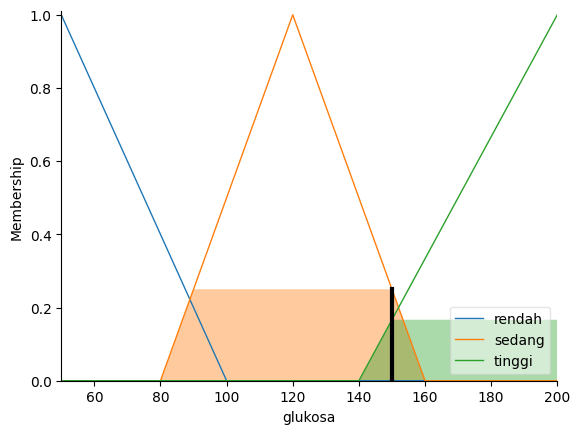

In [22]:

glukosa.view(sim=diabetes_sim)
plt.show()

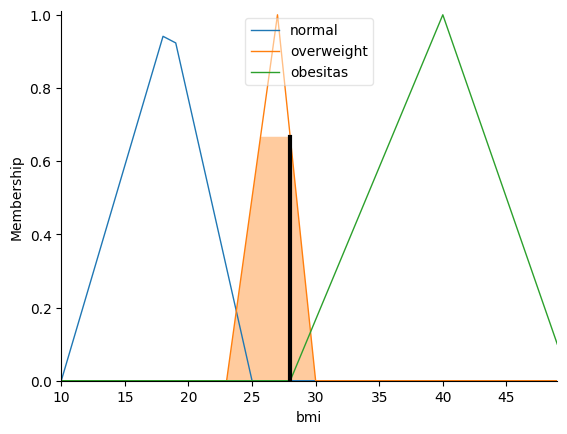

In [23]:

bmi.view(sim=diabetes_sim)
plt.show()

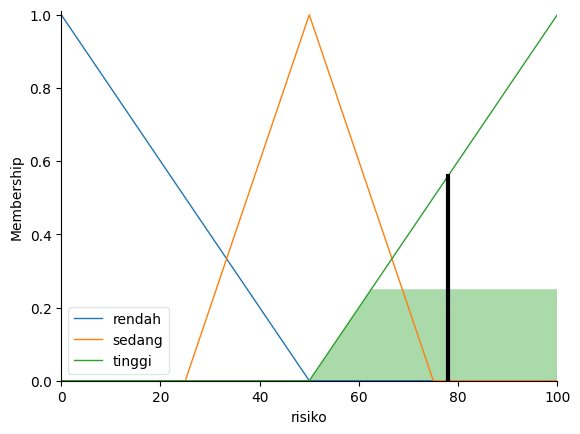

In [24]:

risiko.view(sim=diabetes_sim)
plt.show()